In [35]:
# Import dependencies

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [36]:
# Import csv (includes MovieData.csv and API data)

combined_df = pd.read_csv("Resources/api_merge_df.csv")
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1822,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1823,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1824,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [37]:
# Grouping df by genre
grouped_genre = combined_df.groupby(["genre"])

# Summing totals 
sum_genre = grouped_genre.sum()
sum_genre

,IMDB Rating,Metascore,production_budget,domestic_box_office,international_box_office,Total Box Office
genre,,,,,,
Action,1901.1,14986.0,26038700000,28564369396,54042791666,82607161062
Adventure,1960.5,15995.0,29770700000,35373762992,60900689027,96274452019
Black Comedy,146.9,1124.0,726000000,828709917,1053083322,1881793239
Comedy,1842.2,14392.0,9693100000,14714934121,11417234338,26132168459
Concert/Performance,34.3,333.0,68000000,138249838,52329077,190578915
Documentary,44.3,405.0,231000000,137888308,340125198,478013506
Drama,2928.0,23416.0,13878350000,15535406254,17590844328,33126250582
Horror,608.0,4583.0,2455550000,4354980607,4830632911,9185613518
Musical,154.9,1332.0,1802200000,2917038391,4853065251,7770103642


In [38]:
# Summing genre

sum_genre['genre']=sum_genre.index
sum_genre

,IMDB Rating,Metascore,production_budget,domestic_box_office,international_box_office,Total Box Office,genre
genre,,,,,,,
Action,1901.1,14986.0,26038700000,28564369396,54042791666,82607161062,Action
Adventure,1960.5,15995.0,29770700000,35373762992,60900689027,96274452019,Adventure
Black Comedy,146.9,1124.0,726000000,828709917,1053083322,1881793239,Black Comedy
Comedy,1842.2,14392.0,9693100000,14714934121,11417234338,26132168459,Comedy
Concert/Performance,34.3,333.0,68000000,138249838,52329077,190578915,Concert/Performance
Documentary,44.3,405.0,231000000,137888308,340125198,478013506,Documentary
Drama,2928.0,23416.0,13878350000,15535406254,17590844328,33126250582,Drama
Horror,608.0,4583.0,2455550000,4354980607,4830632911,9185613518,Horror
Musical,154.9,1332.0,1802200000,2917038391,4853065251,7770103642,Musical


In [39]:
# Filtered out genres with less than 30 counts of movies for domestic and international box office revenues

reduced_genre = sum_genre.loc [["Action", "Adventure", "Comedy",
                                "Drama", "Horror", "Romantic Comedy", "Thriller/Suspense"], ["domestic_box_office", "international_box_office"]]
print(reduced_genre)

print()


                   domestic_box_office  international_box_office
genre                                                           
Action                     28564369396               54042791666
Adventure                  35373762992               60900689027
Comedy                     14714934121               11417234338
Drama                      15535406254               17590844328
Horror                      4354980607                4830632911
Romantic Comedy             3326433774                4010510625
Thriller/Suspense          10542737350               14358305257



In [40]:
# Create new dataframe of domestic and international box office revenue totals

reduced_df = pd.DataFrame(reduced_genre)
reduced_df

,domestic_box_office,international_box_office
genre,,
Action,28564369396,54042791666
Adventure,35373762992,60900689027
Comedy,14714934121,11417234338
Drama,15535406254,17590844328
Horror,4354980607,4830632911
Romantic Comedy,3326433774,4010510625
Thriller/Suspense,10542737350,14358305257


In [41]:
# Create new dataframe of domestic and international box office revenue totals

reduced_df['genre']=reduced_df.index
reduced_df

,domestic_box_office,international_box_office,genre
genre,,,
Action,28564369396,54042791666,Action
Adventure,35373762992,60900689027,Adventure
Comedy,14714934121,11417234338,Comedy
Drama,15535406254,17590844328,Drama
Horror,4354980607,4830632911,Horror
Romantic Comedy,3326433774,4010510625,Romantic Comedy
Thriller/Suspense,10542737350,14358305257,Thriller/Suspense


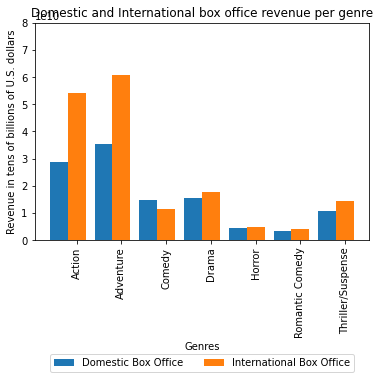

In [42]:
# Bar chart analysis comparing domestic and international box office revenues per genre
# We can see that international box office revenues are higher for all genres except comedy

names = reduced_df['genre'].values
x = np.arange(len(reduced_df))
w = 0.4
plt.bar(x-w, reduced_df['domestic_box_office'].values, width=w, label='Domestic Box Office')
plt.bar(x, reduced_df['international_box_office'].values, width=w, label='International Box Office')
plt.ylim([0,80000000000])
plt.tight_layout
plt.xticks(x, reduced_df["genre"], rotation="vertical")
plt.title('Domestic and International box office revenue per genre')
plt.ylabel('Revenue in tens of billions of U.S. dollars')
plt.xlabel('Genres')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
plt.show()


In [43]:
# Filtered out genres with less than 30 counts of movies for total box office revenue

reducedtotal_genre = sum_genre.loc [["Action", "Adventure", "Comedy",
                                "Drama", "Horror", "Romantic Comedy", "Thriller/Suspense"], ["Total Box Office"]]
print(reducedtotal_genre)

print()


                   Total Box Office
genre                              
Action                  82607161062
Adventure               96274452019
Comedy                  26132168459
Drama                   33126250582
Horror                   9185613518
Romantic Comedy          7336944399
Thriller/Suspense       24901042607



In [44]:
# Create new dataframe for total box office revenue

reducedtotal_df = pd.DataFrame(reducedtotal_genre)
reducedtotal_df

,Total Box Office
genre,
Action,82607161062
Adventure,96274452019
Comedy,26132168459
Drama,33126250582
Horror,9185613518
Romantic Comedy,7336944399
Thriller/Suspense,24901042607


In [45]:
# Create new dataframe for total box office revenue

reducedtotal_df['genre']=reducedtotal_df.index
reducedtotal_df

,Total Box Office,genre
genre,,
Action,82607161062,Action
Adventure,96274452019,Adventure
Comedy,26132168459,Comedy
Drama,33126250582,Drama
Horror,9185613518,Horror
Romantic Comedy,7336944399,Romantic Comedy
Thriller/Suspense,24901042607,Thriller/Suspense


Text(0.5, 69.0, 'Genres')

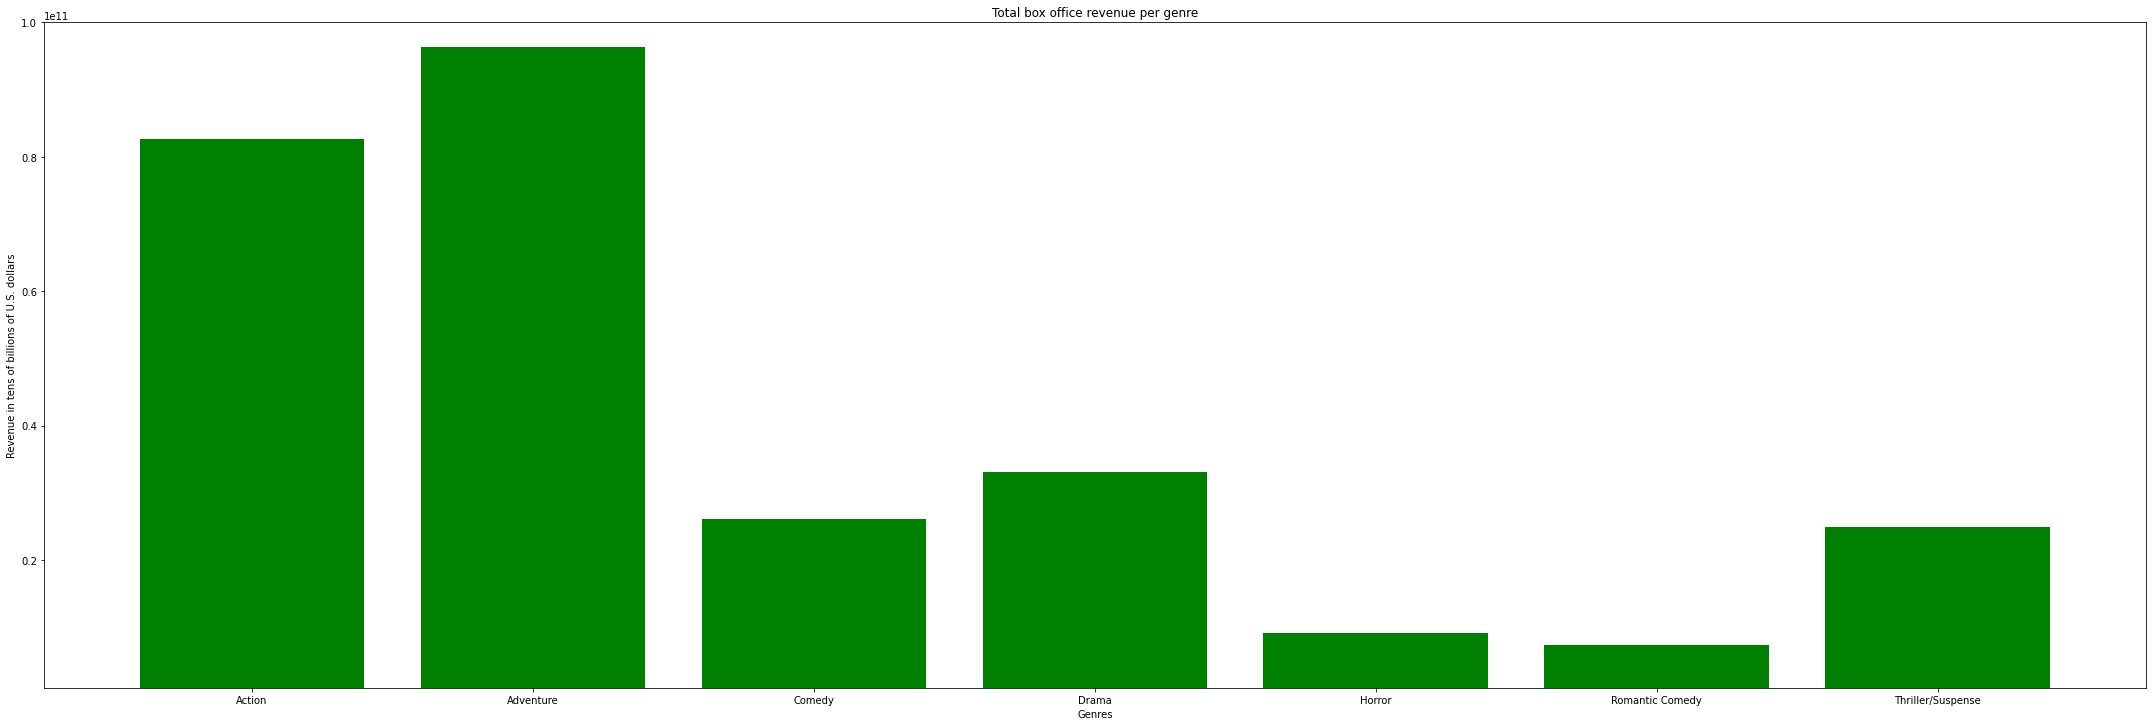

In [46]:
# Bar chart showing total box office revenue per genre
# We can see that adventure movies bring in the most revenue while romantic comedies bring in the least amount

x_axis = np.arange(len(reducedtotal_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(30,10))
plt.bar(x_axis, reducedtotal_df["Total Box Office"], color='g', alpha=1, align="center")
plt.xticks(tick_locations, reducedtotal_df["genre"], rotation="horizontal")
plt.title('Total box office revenue per genre')
plt.ylabel('Revenue in tens of billions of U.S. dollars')
plt.ylim([1000000000,100000000000])
plt.tight_layout()
plt.xlabel('Genres')